<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/natural_language_processing(predict_feeling_in_sentenses).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

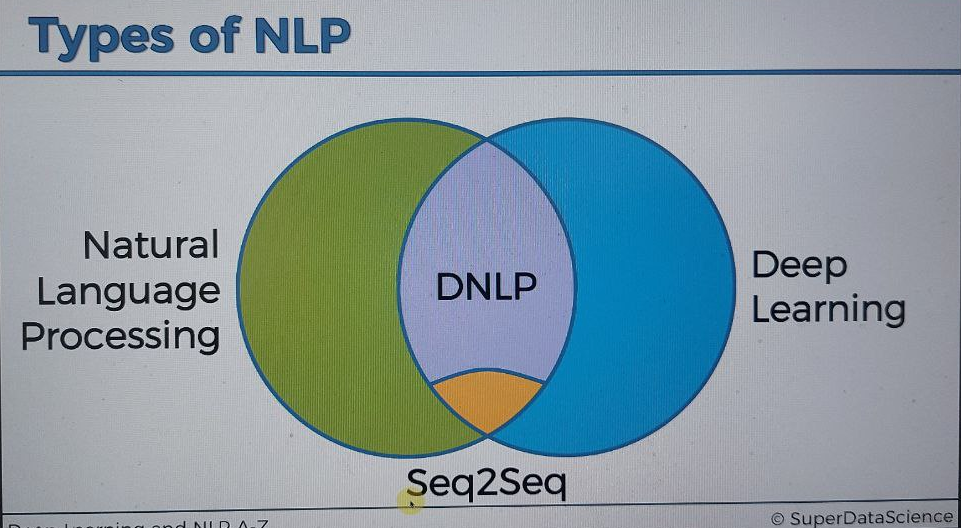

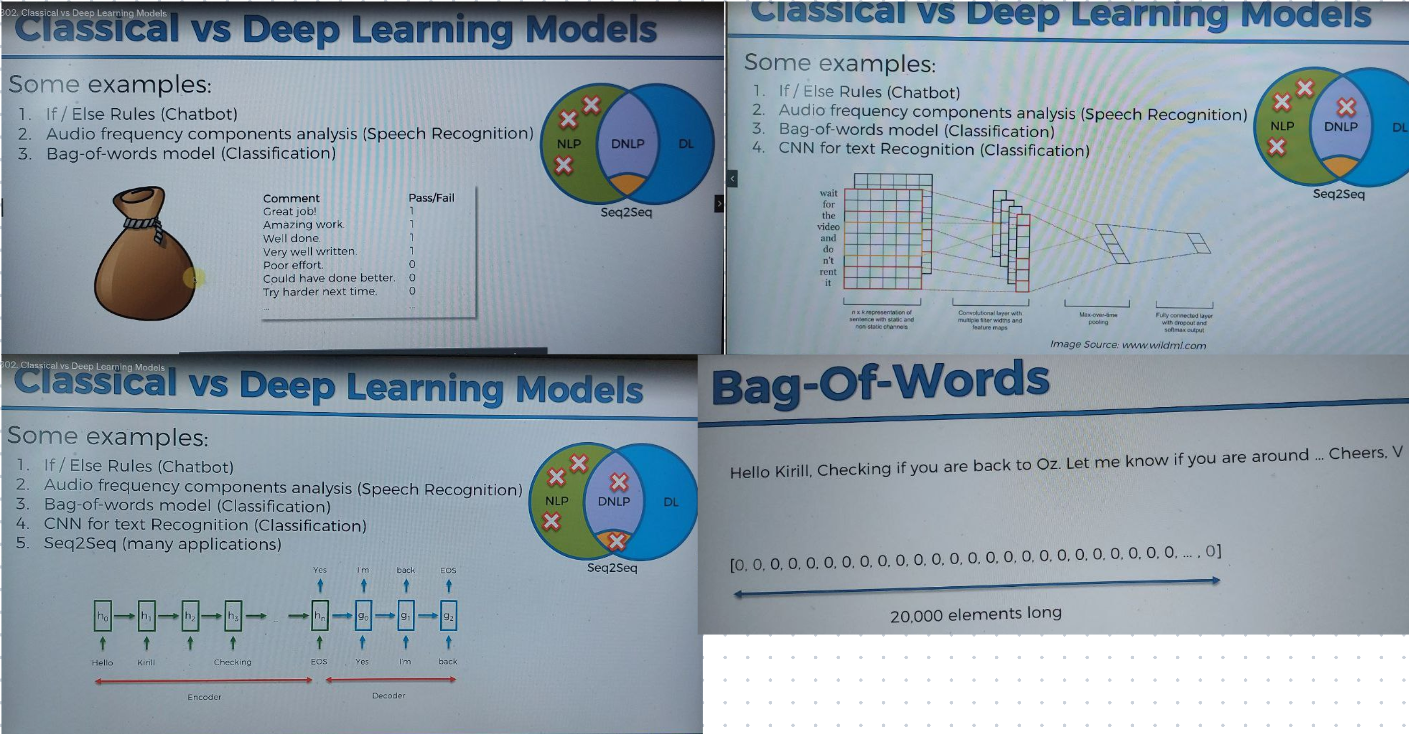

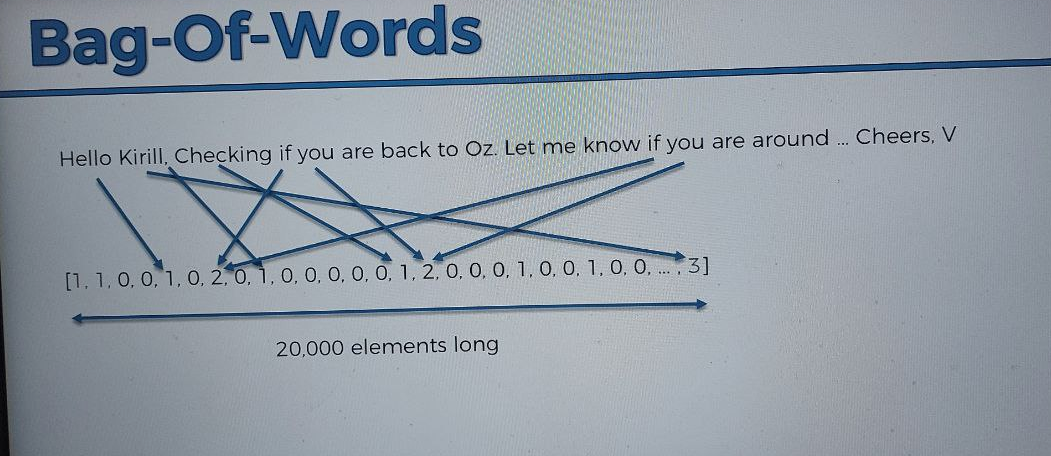

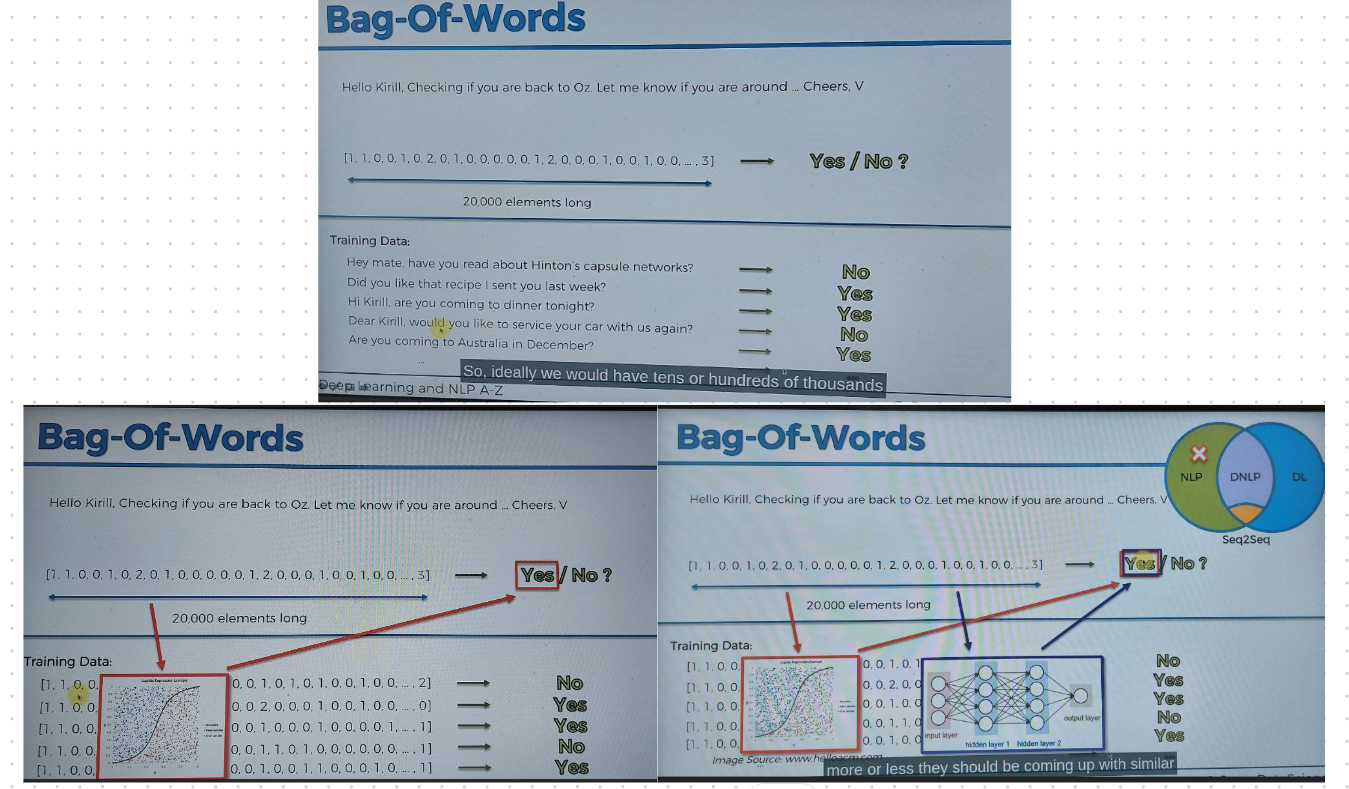

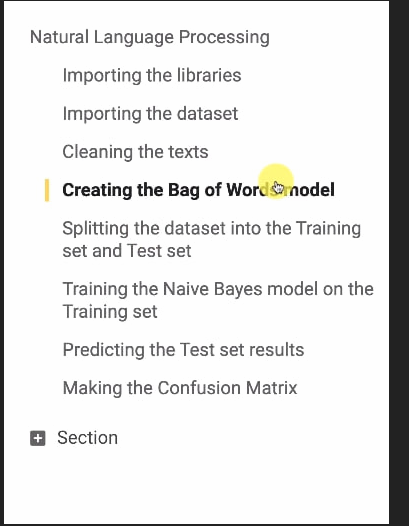

## Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part7-NaturalLanguageProcessing/Session36_NaturalLanguageProcessing/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
#\t => to determined .tsv as an extention
# quoting = 3   => to ignore or delete all double coration (") in the text to avoid the error

## Cleaning the texts (is necessary for NLP to ease the learning process by the machine)



```
* import re => simplify basicly the reviews. remove all punctuation.
* import nltk => is the very classic library to download ensamboles and stopwords(are the words that we dont want them after cleaning text which are not benefit that help to prediction the review. forexamplr: the-er-end,she, ,...)
* from nltk.stem.porter import PorterStemmer => for find the main word and convert them to present form ("i loved them"=>"i love them) because in Bag of Word just we sould have one place for one word with a same meaning(having 1 place for love (not love and loved))
* corpus = [] => ro save cleaning text in the list
* re.sub => replace anything (1) with anything(2) in the dataset (3) that we want
* '[^a-zA-Z]' => any thing that are not letter
```



In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):                                  #the dataset has 1000 rows of reviews
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #remove all symboles except letter
  review = review.lower()                                 #convert all letter to lower case
  review = review.split()                                 #split review as a differnet words
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')              #extract all stopword in English dictionary
  all_stopwords.remove('not')                             #remove 'not' from list of stopwords.becaus ewe want "not"
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)] # ps.stem(word) =? apply steamming to alll the word to convert to simple present form
  review = ' '.join(review)                                                     #.join(review)=> we want to joint all seperate words in last above line . and insert Space between each word  by put ' ' befor the joint command.
  corpus.append(review)                                   # add clean text to Corpus list.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [6]:
from sklearn.feature_extraction.text import CountVectorizer   #CountVextonizer is for Tokenizer to create bag of words
cv = CountVectorizer(max_features = 1500)                     # maximum column or maximum number of columns
X = cv.fit_transform(corpus).toarray()                        #Appy Tkenizer on my list of cleane words  to create input data (X)
y = dataset.iloc[:, -1].values        #load output data as Y to use that for train the machin for learning

In [8]:
len(X[0]) #number of first row that has number of word for first roe

1500

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

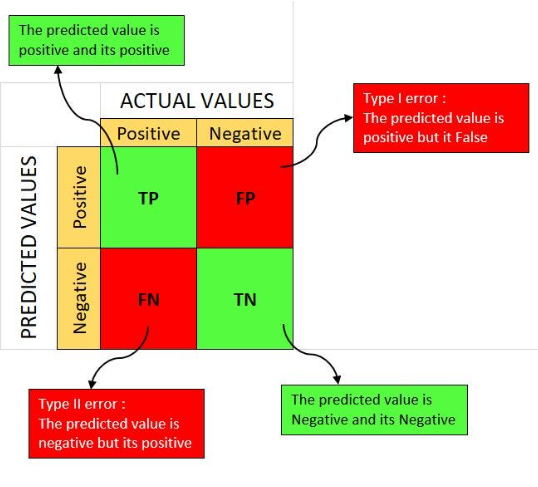

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73



```
# Natural Language Processing Bonus:

What are your customers saying about your product? How do audiences feel about a new movie? How successful was your event?…

These days, reviews contain a wealth of information and Natural Language Processing has the power to reveal valuable insights quickly.

Have you ever wanted to use an NLP model to predict the sentiment of a SINGLE review?

It’s a frequent question that we hear from students, which is why we created a free BONUS to answer precisely that!

Tackle this challenge yourself using the instructions and code outlined in this Colab file.

Here’s the step-by-step coding exercise you’ll receive:

Importing libraries
Importing datasets
Cleaning text
Creating the Bag of Words model
Splitting the data into Training and Test sets
Training thee Naive Bayes model on the Training set
Predicting the Test set results
Making the confusion matrix
Predicting if a single review is positive or negative
Get your Natural Language Processing Bonus Here
```



## Predicting if a single review is positive or negative

### Positive review

Use our model to predict if the following review:

"I love this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [ ]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


The review was correctly predicted as positive by our model.

### Negative review

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [ ]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


The review was correctly predicted as negative by our model.



```
Homework Challenge
Hello students,

Congratulations for having completed Part 7 - Natural Language Processing.

If you are up for some practical activities, here is a little challenge:

1. Run the other classification models we made in Part 3 - Classification, other than the one we used in the last tutorial.

2. Evaluate the performance of each of these models. Try to beat the Accuracy obtained in the tutorial. But remember, Accuracy is not enough, so you should also look at other performance metrics like Precision (measuring exactness), Recall (measuring completeness) and the F1 Score (compromise between Precision and Recall). Please find below these metrics formulas (TP = # True Positives, TN = # True Negatives, FP = # False Positives, FN = # False Negatives):

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 * Precision * Recall / (Precision + Recall)

3. Try even other classification models that we haven't covered in Part 3 - Classification. Good ones for NLP include:

CART

C5.0

Maximum Entropy

Submit your results in the Q&A for this Lecture or by pm and justify in few words why you think it's the most appropriate model.

Enjoy Machine Learning!

Best to all,

Hadelin
```

